# Grade: /20 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model relating $x$ to $y$.




### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#It's dangerous to go alone.  Take these!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from scipy.special import factorial
from statsmodels.tools import add_constant
from scipy.optimize import minimize
from scipy.special import gammaln

df = pd.read_csv("poisson_regression_data.csv")

df

,x,y
0,0.232466,3
1,-0.370613,1
2,0.929731,4
3,0.356606,1
4,0.387176,2
...,...,...
96,-0.668326,1
97,0.101771,1
98,-0.773905,1
99,-0.311436,0


# Question 1: /2 Mark(s)

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg( y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y_i!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y_i!)$ in your function.


Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


In [2]:
def poissonNegLogLikelihood(lam,y):
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_log_lik = -np.sum(y*np.log(lam)-lam)
    return neg_log_lik

lam = 1.3
y = np.array([2,1,0,0])
test1 = poissonNegLogLikelihood(lam,y)
print(test1)
lam1=np.array([1,0.5,1,3])
y1 = np.array([2,1,0,0])
test2 = poissonNegLogLikelihood(lam1,y1)
print(test2)

#lam = 0 
#test3 = poissonNegLogLikelihood(lam,y1)



4.412907206597527
6.193147180559945


Write your answer here

---when you set the lam = 0, the system will throw a runtimeerror,because the log can't take negative or zero value inside, and also by possian distribution defination, we won't have some event happen negative time durring certain period

### Question 2: /3 Mark(s)

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [3]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(X@np.transpose(b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik



b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
poissonRegressionNegLogLikelihood(b, X, y)

3211.7843052468816

### Question 3: /2 Mark(s)

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?


Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---
a)Because if we apply the exponential function to $\mathbf{X}\beta$, it is guranteed that the $\lambda$ is greater than 0.

b)because if you fit without the exp, you might get a $\lambda = \mathbf{X}\beta$ being negative, but the $\lambda$ can't be negative.

### Question 4: /1 Mark(s)

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [4]:
def modelPrediction(b,X):
    yhat = np.exp(X@np.transpose(b))
    return yhat
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T


modelPrediction(b,X)

array([ 148.4131591 , 2980.95798704,  148.4131591 ])

### Question 5: /3 Mark(s)

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [5]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(len(X[0]))
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood,beta_start,args=(X,y))
    # Extract the maximum likelihood estimates from the optimizer.
    
    betas = mle.x
    return betas

X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

fitModel(X,y)

array([ 0.94827556, -0.52953521])

### Question 6: /4 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

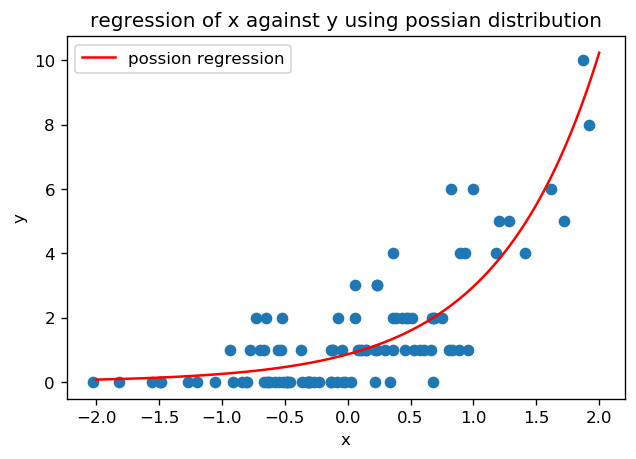

In [6]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")

fig, ax = plt.subplots(dpi = 120)

# Scatter the data. 
plt.scatter(df.x, df.y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('regression of x against y using possian distribution')

# Fit the model.  You can use your functions.  
x = df.x.values.reshape(-1,1) 
y= df.y.values
X = np.c_[np.ones(x.shape[0]),x]

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)

newX = np.c_[np.ones(1001),newx]

# Make predictions on the new data
y_predicted= modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx,y_predicted,label = "possion regression",c="red")
ax.legend()

### Question 7:  /4 Mark(s)

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and plot the predictions over the same range.  Feel free to use `statsmodels` to fit the linear regression.

Intercept   -0.433397
y            0.306881
dtype: float64


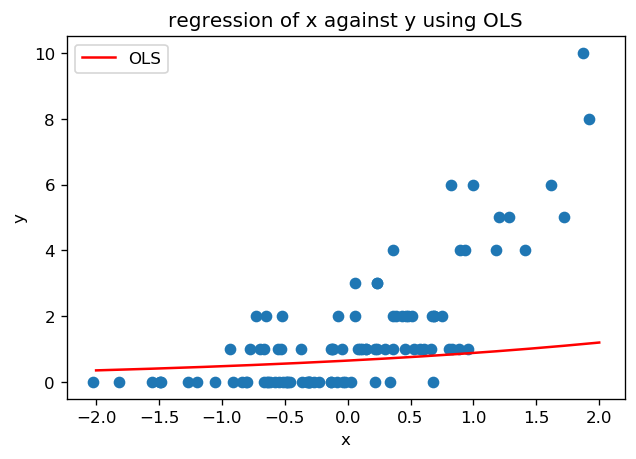

In [7]:

# Read in the data
df =  pd.read_csv("poisson_regression_data.csv")
# Instantiate the model
model = sm.ols('x ~ y', data=df).fit()

# Fit the model.  Remember, in statsmodels this happens in a different step!
# You can use either the formula or the functionl API here 
ols_betas = model.params
print(ols_betas)

# Make predictions over the range -2 to 2
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(newx.size),newx]
y_predicted= modelPrediction(ols_betas,newX)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi =120)
plt.scatter(df.x,df.y)
plt.plot(newx,y_predicted,label = "OLS",c="red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('regression of x against y using OLS')
ax.legend()





### Question 8: /1 Mark(s)

a) Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things. Provide your answer below in markdown in fewer than 5 sentences.

---

a)first of all, the OLS turn to be lack of fit compared with possian regression,esptially when x get larger. secondly, the OLS will get the negative counts of thing. it is inpossible for some events happen negatvive times among certain period.




### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.